In [1]:
import pandas as pd
import numpy as np
# m1 = pd.read_csv('/content/modeling1.csv')
# m2 = pd.read_csv('/content/modeling2.csv')
m3 = pd.read_csv('/content/modeling3.csv')
m4 = pd.read_csv('/content/modeling4.csv')
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#머신러닝닝

In [2]:
m4

,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,오류발생여부
0,70.386480,102.086480,136.926080,23.226,212.043,0
1,72.179318,114.079318,149.928068,23.899,211.625,0
2,71.669853,96.769853,131.742003,23.315,201.844,0
3,72.674475,108.574475,143.510725,23.291,212.419,0
4,71.725982,86.825982,122.311132,23.657,209.525,0
...,...,...,...,...,...,...
24036,70.664452,65.764452,100.773102,23.339,209.513,0
24037,71.015225,106.115225,141.148725,23.356,205.288,0
24038,71.727125,98.127125,133.960875,23.889,209.983,0
24039,69.732381,98.432381,133.916831,23.656,213.413,0


In [3]:
#input target split
y = m4['오류발생여부']
X = m4.drop(['오류발생여부'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# #scale -> 넣고 안넣고 잘 선택 필요요
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
# #scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

#fit
# from sklearn.linear_model import LogisticRegression
#m1 = XGBClassifier()

# from sklearn.ensemble import RandomForestClassifier
# m1 = RandomForestClassifier(max_depth=10)

# from lightgbm import LGBMClassifier
# m1 = LGBMClassifier()

from catboost import CatBoostClassifier
m03 = CatBoostClassifier()

m03.fit(X_train, y_train)

Learning rate set to 0.036409
0:	learn: 0.5791670	total: 77ms	remaining: 1m 16s
1:	learn: 0.4640249	total: 116ms	remaining: 57.7s
2:	learn: 0.3771271	total: 130ms	remaining: 43.2s
3:	learn: 0.3067791	total: 141ms	remaining: 35.2s
4:	learn: 0.2470932	total: 159ms	remaining: 31.6s
5:	learn: 0.1981529	total: 166ms	remaining: 27.6s
6:	learn: 0.1596817	total: 175ms	remaining: 24.8s
7:	learn: 0.1323093	total: 183ms	remaining: 22.6s
8:	learn: 0.1092497	total: 192ms	remaining: 21.2s
9:	learn: 0.0938167	total: 202ms	remaining: 20s
10:	learn: 0.0776053	total: 231ms	remaining: 20.8s
11:	learn: 0.0643597	total: 245ms	remaining: 20.2s
12:	learn: 0.0533444	total: 257ms	remaining: 19.5s
13:	learn: 0.0455344	total: 277ms	remaining: 19.5s
14:	learn: 0.0380373	total: 295ms	remaining: 19.4s
15:	learn: 0.0319483	total: 319ms	remaining: 19.6s
16:	learn: 0.0271538	total: 339ms	remaining: 19.6s
17:	learn: 0.0233394	total: 358ms	remaining: 19.6s
18:	learn: 0.0201243	total: 376ms	remaining: 19.4s
19:	learn: 0.

In [4]:
#m.score(X_train_scaled, y_train)

m03.score(X_train, y_train)

#m.score(X_test_scaled, y_test)
m03.score(X_test, y_test)

y_pred_m3 = m03.predict(X_test)

from sklearn.metrics import classification_report
report_m3 = classification_report(y_test, y_pred_m3)
importance_m3 = m03.feature_importances_
importance_m3

array([14.3508385 , 10.54238047,  7.7615949 , 58.39664353,  8.9485426 ])

In [5]:
print(m03.score(X_train, y_train))
print(m03.score(X_test, y_test))
print(report_m3)

0.999948003327787
0.9997920565606155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4594
           1       1.00      1.00      1.00       215

    accuracy                           1.00      4809
   macro avg       1.00      1.00      1.00      4809
weighted avg       1.00      1.00      1.00      4809



In [6]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=X.columns, y=importance_m3)])
fig.update_layout(width=600)
fig.show()

#공정별 오류 분류

#딥러닝닝

In [7]:
#input target split
y = m3['Error_class']
X = m3.drop(['Error_class'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#스케일
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#tensorflow import
import tensorflow as tf
#from tensorflow import keras 잘 안씀
from tensorflow.keras import layers


#모델
model = tf.keras.Sequential([
layers.Dense(128, activation='relu', input_dim=5, name='Input_data-128-relu-dim5'), #64 = 퍼셉트론 64개 #input_shape = (6,0)
layers.Dense(64, activation='relu', name='D2-64-relu'), #64 = 퍼셉트론 64개, 레이어를 원하는대로 늘릴 수 있음 , 해보기 전 까지 알 수 없음 
#layers.Dropout(0.2), #다음 레이어로 넘어갈 때, 20%만큼의 데이터를 날림 --> 오버피팅 방지(모데륙제제)
layers.Dense(32, activation='relu', name='D3-32-relu'),
layers.Dense(4, activation = 'softmax', name='softmax-4')  #softmax(확률로 4개의 분류로 나타내 줌), 다중분류
])
model.summary()


#컴파일
optimizer = tf.keras.optimizers.RMSprop(0.001) #(0.001) = learning rate

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_data-128-relu-dim5 (D  (None, 128)              768       
 ense)                                                           
                                                                 
 D2-64-relu (Dense)          (None, 64)                8256      
                                                                 
 D3-32-relu (Dense)          (None, 32)                2080      
                                                                 
 softmax-4 (Dense)           (None, 4)                 132       
                                                                 
Total params: 11,236
Trainable params: 11,236
Non-trainable params: 0
_________________________________________________________________


In [8]:
#트레이닝
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split = 0.2, batch_size = 24)

Epoch 1/200
642/642 [==============================] - 9s 10ms/step - loss: 0.1175 - accuracy: 0.9680 - val_loss: 0.0748 - val_accuracy: 0.9810
Epoch 2/200
642/642 [==============================] - 5s 8ms/step - loss: 0.0719 - accuracy: 0.9797 - val_loss: 0.0771 - val_accuracy: 0.9784
Epoch 3/200
642/642 [==============================] - 4s 7ms/step - loss: 0.0674 - accuracy: 0.9810 - val_loss: 0.0733 - val_accuracy: 0.9787
Epoch 4/200
642/642 [==============================] - 3s 4ms/step - loss: 0.0655 - accuracy: 0.9806 - val_loss: 0.0638 - val_accuracy: 0.9854
Epoch 5/200
642/642 [==============================] - 2s 3ms/step - loss: 0.0645 - accuracy: 0.9812 - val_loss: 0.0953 - val_accuracy: 0.9672
Epoch 6/200
642/642 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9815 - val_loss: 0.0609 - val_accuracy: 0.9844
Epoch 7/200
642/642 [==============================] - 2s 2ms/step - loss: 0.0619 - accuracy: 0.9823 - val_loss: 0.0606 - val_accuracy: 0.985

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [10]:
import plotly.graph_objects as go

epochs=list(range(1, len(history.history['accuracy'])+1))
train_loss = history.history['accuracy']
val_loss =  history.history['val_accuracy']

fig = go.Figure(data=go.Scatter(x=epochs,
                                y=history.history['accuracy'],
                                name = 'Train Accuracy'))
fig.add_trace(go.Scatter(x=epochs, y=history.history['val_accuracy'],
                        name = 'Validation Accuracy'))

fig.update_xaxes(title_text="epoch")
fig.update_yaxes(title_text="accuracy")
fig.update_layout(legend=dict(yanchor="top", y=1.15, xanchor="left", x=0.75), 
                  title_text="Model Evaluation", title_x=0.5, width=800)
fig.show()

In [11]:
model.evaluate(X_test_scaled, y_test)

151/151 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9805


[0.06013566628098488, 0.9804533123970032]

In [12]:
epochs = list(range(1, len(history.history['accuracy']) + 1))
train_accuracy = history.history['accuracy']
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=epochs,
                                y=train_accuracy,
                                name = 'train_accuracy'))
fig.show()

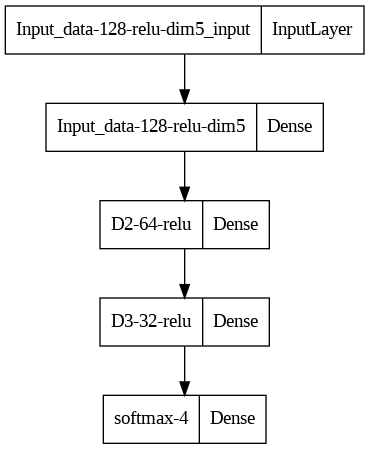

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'softmax.png')

#2진

In [35]:
#input target split
y = m4['오류발생여부']
X = m4.drop(['오류발생여부'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#스케일
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#tensorflow import
import tensorflow as tf
#from tensorflow import keras 잘 안씀
from tensorflow.keras import layers


#모델
model1 = tf.keras.Sequential([
layers.Dense(128, activation='relu', input_dim=5, name='128-relu-dim5'), #64 = 퍼셉트론 64개 #input_shape = (6,0)
layers.Dense(64, activation='relu', name='D2-64-relu'), #64 = 퍼셉트론 64개, 레이어를 원하는대로 늘릴 수 있음 , 해보기 전 까지 알 수 없음 
#layers.Dropout(0.2), #다음 레이어로 넘어갈 때, 20%만큼의 데이터를 날림 --> 오버피팅 방지(모데륙제제)
layers.Dense(32, activation='relu', name='D3-32-relu'),
layers.Dense(2, activation = 'softmax', name='softmax-2or4')  #softmax(확률로 4개의 분류로 나타내 줌), 다중분류
])
model1.summary()


#컴파일
optimizer = tf.keras.optimizers.RMSprop(0.001) #(0.001) = learning rate

model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 128-relu-dim5 (Dense)       (None, 128)               768       
                                                                 
 D2-64-relu (Dense)          (None, 64)                8256      
                                                                 
 D3-32-relu (Dense)          (None, 32)                2080      
                                                                 
 softmax-2or4 (Dense)        (None, 2)                 66        
                                                                 
Total params: 11,170
Trainable params: 11,170
Non-trainable params: 0
_________________________________________________________________


In [36]:
#트레이닝
history = model1.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2, batch_size = 24)

Epoch 1/100
642/642 [==============================] - 7s 10ms/step - loss: 0.0659 - accuracy: 0.9765 - val_loss: 0.0518 - val_accuracy: 0.9763
Epoch 2/100
642/642 [==============================] - 4s 7ms/step - loss: 0.0171 - accuracy: 0.9929 - val_loss: 0.0123 - val_accuracy: 0.9932
Epoch 3/100
642/642 [==============================] - 2s 3ms/step - loss: 0.0144 - accuracy: 0.9938 - val_loss: 0.0212 - val_accuracy: 0.9906
Epoch 4/100
642/642 [==============================] - 2s 3ms/step - loss: 0.0133 - accuracy: 0.9940 - val_loss: 0.0098 - val_accuracy: 0.9945
Epoch 5/100
642/642 [==============================] - 2s 3ms/step - loss: 0.0120 - accuracy: 0.9949 - val_loss: 0.0182 - val_accuracy: 0.9914
Epoch 6/100
642/642 [==============================] - 2s 3ms/step - loss: 0.0122 - accuracy: 0.9953 - val_loss: 0.0241 - val_accuracy: 0.9914
Epoch 7/100
642/642 [==============================] - 2s 2ms/step - loss: 0.0118 - accuracy: 0.9956 - val_loss: 0.0537 - val_accuracy: 0.986

In [37]:
import plotly.graph_objects as go

epochs=list(range(1, len(history.history['accuracy'])+1))
train_loss = history.history['accuracy']
val_loss =  history.history['val_accuracy']

fig = go.Figure(data=go.Scatter(x=epochs,
                                y=history.history['accuracy'],
                                name = 'Train Accuracy'))
fig.add_trace(go.Scatter(x=epochs, y=history.history['val_accuracy'],
                        name = 'Validation Accuracy'))

fig.update_xaxes(title_text="epoch")
fig.update_yaxes(title_text="accuracy")
fig.update_layout(legend=dict(yanchor="top", y=1.15, xanchor="left", x=0.75), 
                  title_text="Model Evaluation", title_x=0.5, width=800)
fig.show()

In [38]:
model1.evaluate(X_test_scaled, y_test)

151/151 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9992


[0.0029655962716788054, 0.9991682171821594]

151/151 [==============================] - 1s 4ms/step - loss: 0.1816 - accuracy: 0.9551
0.18157784640789032
0.9550842046737671


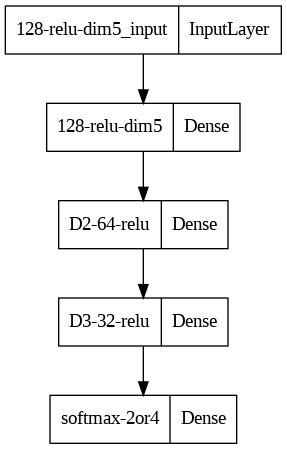

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model1, 'softmax.png')

151/151 [==============================] - 1s 3ms/step


In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 성능 지표 계산
#accuracy = accuracy_score(y_true, y_pred)
#precision = precision_score(y_true, y_pred)
#recall = recall_score(y_true, y_pred)
#f1 = f1_score(y_true, y_pred)

# 데이터프레임 생성
df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

NameError: ignored